In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#讀A用dfA存
import pandas as pd
import os
dir = '/content/gdrive/MyDrive/grayagument/A'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        #print(filename)
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':
                print(os.path.split(dirname))
                label.append(os.path.split(dirname)[1][0])
                path.append(os.path.join(dirname,filename))
                print(os.path.join(dirname,filename))
dfA = pd.DataFrame(columns = ['path','label'])
dfA['path'] = path
dfA['label'] = label

串流輸出內容已截斷至最後 5000 行。
('/content/gdrive/MyDrive/grayagument/A', '3')
/content/gdrive/MyDrive/grayagument/A/3/20190728163755_8SSB20N60164H1DG97T02P0_R173_1_SolderLight.png
('/content/gdrive/MyDrive/grayagument/A', '3')
/content/gdrive/MyDrive/grayagument/A/3/20190905205002_8SSB20N60325H1DG99200GY_R198_1_SolderLight.png
('/content/gdrive/MyDrive/grayagument/A', '3')
/content/gdrive/MyDrive/grayagument/A/3/20190823072047_8SSB20N60324H1DG98L00J7_R468_1_SolderLight.png
('/content/gdrive/MyDrive/grayagument/A', '3')
/content/gdrive/MyDrive/grayagument/A/3/20190809130447_8SSB20N60287H1DG98508TW_R233_1_SolderLight.png
('/content/gdrive/MyDrive/grayagument/A', '3')
/content/gdrive/MyDrive/grayagument/A/3/20190818015612_8SSB20N60325H1DG98E02KF_R1130_1_SolderLight.png
('/content/gdrive/MyDrive/grayagument/A', '3')
/content/gdrive/MyDrive/grayagument/A/3/20190729175735_8SSB20N60222H1DG97W04M2_R1057_1_SolderLight.png
('/content/gdrive/MyDrive/grayagument/A', '3')
/content/gdrive/MyDrive/grayagument/

In [3]:
#check
dfA['label'] = dfA['label'].astype('category')
dfA['label'].value_counts()

0    7182
7    3317
6    2119
4    1824
1    1754
5    1156
3     836
2     807
Name: label, dtype: int64

In [4]:
#A資料集各取800張
dfA = dfA.sample(frac = 1)
dfA = dfA.groupby(['label']).head(800)

In [5]:
#check
dfA['label'] = dfA['label'].astype('category')
dfA['label'].value_counts()

7    800
6    800
5    800
4    800
3    800
2    800
1    800
0    800
Name: label, dtype: int64

In [6]:
#讀B用dfB存
import pandas as pd
import os
dir = '/content/gdrive/MyDrive/grayagument/B'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        #print(filename)
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':
                print(os.path.split(dirname))
                label.append(os.path.split(dirname)[1][0])
                path.append(os.path.join(dirname,filename))
                print(os.path.join(dirname,filename))
dfB = pd.DataFrame(columns = ['path','label'])
dfB['path'] = path
dfB['label'] = label

串流輸出內容已截斷至最後 5000 行。
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagument/B/4/0_0_804.png
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagument/B/4/0_0_2072.png
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagument/B/4/0_0_2212.png
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagument/B/4/0_0_7483.png
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagument/B/4/0_0_249.png
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagument/B/4/0_0_6359.png
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagument/B/4/0_0_5148.png
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagument/B/4/0_0_7305.png
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagument/B/4/0_0_8918.png
('/content/gdrive/MyDrive/grayagument/B', '4')
/content/gdrive/MyDrive/grayagumen

In [7]:
#check
dfB['label'] = dfB['label'].astype('category')
dfB['label'].value_counts()

0    2413
6     210
5     209
2     209
7     208
3     208
4     207
1     206
Name: label, dtype: int64

In [8]:
#B資料集各取200張
dfB = dfB.sample(frac = 1)
dfB = dfB.groupby(['label']).head(200)

In [9]:
#check
dfB['label'] = dfB['label'].astype('category')
dfB['label'].value_counts()

7    200
6    200
5    200
4    200
3    200
2    200
1    200
0    200
Name: label, dtype: int64

In [11]:
#分割資料集A,B
from sklearn.model_selection import train_test_split
A_train,A_test=train_test_split(dfA,random_state=42,test_size=0.2)
B_train,B_test=train_test_split(dfB,random_state=42,test_size=0.2)
print(A_train.shape)
print(A_test.shape)
print(B_train.shape)
print(B_test.shape)

(5120, 2)
(1280, 2)
(1280, 2)
(320, 2)


In [14]:
#分割A_test與B測試數量一樣
#A資料測試集再各取40張
A_test = A_test.sample(frac = 1)
A_test = A_test.groupby(['label']).head(40)

In [15]:
#check
A_test['label'] = A_test['label'].astype('category')
A_test['label'].value_counts()

7    40
6    40
5    40
4    40
3    40
2    40
1    40
0    40
Name: label, dtype: int64

In [30]:
#合併訓練驗證資料
mix_train=pd.concat([A_train,B_train],keys=['label','path'])
mix_train['label'] = mix_train['label'].astype('category')
mix_train['label'].value_counts()
mix_train

path label
label 18935  /content/gdrive/MyDrive/grayagument/A/4/202005...     4
      17571  /content/gdrive/MyDrive/grayagument/A/4/201909...     4
      1657   /content/gdrive/MyDrive/grayagument/A/5/0_0_83...     5
      6884   /content/gdrive/MyDrive/grayagument/A/7/0_0_15...     7
      1007   /content/gdrive/MyDrive/grayagument/A/5/0_0_39...     5
...                                                        ...   ...
path  656    /content/gdrive/MyDrive/grayagument/B/7/0_0_90...     7
      912    /content/gdrive/MyDrive/grayagument/B/1/0_0_32...     1
      1051   /content/gdrive/MyDrive/grayagument/B/3/0_0_33...     3
      295    /content/gdrive/MyDrive/grayagument/B/5/0_0_45...     5
      632    /content/gdrive/MyDrive/grayagument/B/7/0_0_98...     7

[6400 rows x 2 columns]

In [16]:
#import
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np  
import itertools
import json
import os

im_height = 224
im_width = 224
batch_size = 64
epochs = 100

# 创建保存模型的文件夹
if not os.path.exists("save_weights"):
    os.makedirs("save_weights")


# 定义训练集图像生成器，并进行图像增强
train_image_generator = ImageDataGenerator( rescale=1./255, # 归一化
                                            validation_split=0.2,
                                            )
test_image_generator=ImageDataGenerator( rescale=1./255, # 归一化
                                            )
                                            
# 使用图像生成器从文件夹train_dir中读取样本，对标签进行one-hot编码
train_data_gen = train_image_generator.flow_from_dataframe(dataframe=mix_train, #从训练集路径读取图片
                                                           batch_size=batch_size, #一次训练所选取的样本数
                                                           x_col='path',
                                                           y_col='label',
                                                           class_mode='categorical',
                                                           subset= "training",
                                                           color_mode='rgb',
                                                           target_size=(224,224)
                                                           ) 
              
total_train = train_data_gen.n 

# 使用图像生成器从验证集validation_dir中读取样本
val_data_gen = train_image_generator.flow_from_dataframe(dataframe=mix_train,
                                                         batch_size=batch_size, #一次训练所选取的样本数
                                                         x_col='path',
                                                         y_col='label',
                                                         class_mode='categorical',#one-hot编码
                                                         subset= "validation",
                                                         color_mode='rgb',
                                                         target_size=(224,224)
                                                         ) 

test_data_genA=test_image_generator.flow_from_dataframe(dataframe=A_test,
                                                       x_col='path',
                                                       y_col='label',
                                                       class_mode='categorical',
                                                       batch_size=batch_size,
                                                       color_mode='rgb',
                                                       shuffle=False,
                                                       target_size=(224,224)
                                                       )

test_data_genB=test_image_generator.flow_from_dataframe(dataframe=B_test,
                                                       x_col='path',
                                                       y_col='label',
                                                       class_mode='categorical',
                                                       batch_size=batch_size, 
                                                       color_mode='rgb',
                                                       shuffle=False,
                                                       target_size=(224,224)
                                                       )
                                                       
                                                              
# 验证集样本数      
total_val = val_data_gen.n


Found 5120 validated image filenames belonging to 8 classes.
Found 1280 validated image filenames belonging to 8 classes.
Found 320 validated image filenames belonging to 8 classes.
Found 320 validated image filenames belonging to 8 classes.


In [17]:
#使用tf.keras.applications中的DenseNet121网络，并且使用官方的预训练模型
covn_base = tf.keras.applications.DenseNet121(weights='imagenet',include_top=False,input_shape=(224,224,3))
covn_base.trainable = True

#冻结前面的层，训练最后5层
for layers in covn_base.layers[:-5]:
    layers.trainable = False
    
#构建模型    
model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.GlobalAveragePooling2D())  #加入全局平均池化层
model.add(tf.keras.layers.Dense(512,activation='relu'))  #添加全连接层
model.add(tf.keras.layers.Dropout(rate=0.5))  #添加Dropout层，防止过拟合
model.add(tf.keras.layers.Dense(8,activation='softmax'))  #添加输出层 8個類別
model.summary()   #打印每层参数信息 

#编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #使用adam优化器，学习率为0.0001
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), #交叉熵损失函数
              metrics=["accuracy"]) #评价函数


29097984/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4104      
Total params: 7,566,408
Trainable params: 567,816
Non-trainable params: 6,998,592
_________________________________________________________________


In [19]:
#回调函数1:学习率衰减
reduce_lr = ReduceLROnPlateau(
                                monitor='val_loss', #需要监视的值
                                factor=0.1,  #学习率衰减为原来的1/10
                                patience=2,  #当patience个epoch过去而模型性能不提升时，学习率减少的动作会被触发
                                #mode='auto', #当监测值为val_acc时，模式应为max，当监测值为val_loss时，模式应为min，在auto模式下，评价准则由被监测值的名字自动推断
                                verbose=1 #如果为True，则为每次更新输出一条消息，默认值:False
                             )
#回调函数2:保存最优模型
checkpoint = ModelCheckpoint(
                                filepath='./save_weights/myDenseNet121.ckpt', #保存模型的路径
                                monitor='val_acc', #需要监视的值
                                save_weights_only=False, #若设置为True，则只保存模型权重，否则将保存整个模型（包括模型结构，配置信息等）
                                save_best_only=False, #当设置为True时，监测值有改进时才会保存当前的模型
                                #mode='auto', #当监测值为val_acc时，模式应为max，当监测值为val_loss时，模式应为min，在auto模式下，评价准则由被监测值的名字自动推断
                                period=1 #CheckPoint之间的间隔的epoch数
                            )

In [20]:
#trainning
history = model.fit(x=train_data_gen,   #输入训练集
                    steps_per_epoch=total_train // batch_size, #一个epoch包含的训练步数
                    epochs=100, #训练模型迭代次数
                    validation_data=val_data_gen,  #输入验证集
                    validation_steps=total_val // batch_size, #一个epoch包含的训练步数
                    ) #执行回调函数
                    
#保存训练好的模型权重                    
model.save_weights('./save_weights/myNASNetMobile.ckpt',save_format='tf') 

# 记录训练集和验证集的准确率和损失值
history_dict = history.history
train_loss = history_dict["loss"] #训练集损失值
train_accuracy = history_dict["accuracy"] #训练集准确率
val_loss = history_dict["val_loss"] #验证集损失值
val_accuracy = history_dict["val_accuracy"] #验证集准确率

Epoch 1/100
80/80 [==============================] - 1436s 18s/step - loss: 1.6445 - accuracy: 0.4258 - val_loss: 1.2727 - val_accuracy: 0.6828
Epoch 2/100
80/80 [==============================] - 15s 188ms/step - loss: 1.1203 - accuracy: 0.6279 - val_loss: 0.9355 - val_accuracy: 0.7406
Epoch 3/100
80/80 [==============================] - 15s 187ms/step - loss: 0.9389 - accuracy: 0.6840 - val_loss: 0.7307 - val_accuracy: 0.7984
Epoch 4/100
80/80 [==============================] - 15s 185ms/step - loss: 0.7952 - accuracy: 0.7381 - val_loss: 0.6016 - val_accuracy: 0.8445
Epoch 5/100
80/80 [==============================] - 15s 187ms/step - loss: 0.6997 - accuracy: 0.7746 - val_loss: 0.5337 - val_accuracy: 0.8680
Epoch 6/100
80/80 [==============================] - 15s 185ms/step - loss: 0.6329 - accuracy: 0.8000 - val_loss: 0.4768 - val_accuracy: 0.8680
Epoch 7/100
80/80 [==============================] - 15s 188ms/step - loss: 0.5726 - accuracy: 0.8170 - val_loss: 0.4375 - val_accuracy:

In [21]:
#model.save('Densenetmodel.h5')
model.save('/content/gdrive/MyDrive/racedata/Densegrayagumix.h5')

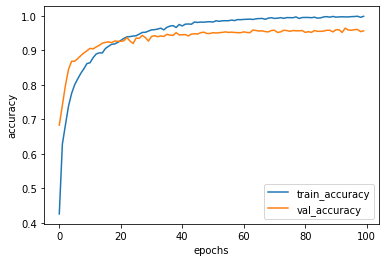

In [22]:
plt.figure()
plt.plot(range(100), train_accuracy, label='train_accuracy')
plt.plot(range(100), val_accuracy, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [23]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
test_image=[]
for i in A_test['path']:
    print(i)
    img = image.load_img(i,target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
testA = np.array(test_image)

/content/gdrive/MyDrive/grayagument/A/6/0_0_1228.png
/content/gdrive/MyDrive/grayagument/A/2/0_0_7012.png
/content/gdrive/MyDrive/grayagument/A/3/20200404030403_8SSB20N60318H1DG04208H1_R3619_1_SolderLight.png
/content/gdrive/MyDrive/grayagument/A/6/0_0_5658.png
/content/gdrive/MyDrive/grayagument/A/3/20190906045432_8SSB20N60325H1DG99304D7_R130_1_S.png
/content/gdrive/MyDrive/grayagument/A/0/20190807223119_8SSB20N60287H1DG9850E3N_R270_1_SolderLight.png
/content/gdrive/MyDrive/grayagument/A/0/20190812212243_8SSB20N60114H1DG98A03ZG_R854_1_SolderLight.png
/content/gdrive/MyDrive/grayagument/A/1/20190814073442_8SSB20N60110H1DG98C03F5_R721_1_SolderLight.png
/content/gdrive/MyDrive/grayagument/A/3/20190902072252_8SSB20N60327H1DG98W014W_R151_1_SolderLight.png
/content/gdrive/MyDrive/grayagument/A/4/20190925012048_8SSB20N60112H1DG99M069B_R531_1_S.png
/content/gdrive/MyDrive/grayagument/A/0/20190812200321_8SSB20N60114H1DG98A0438_R173_1_SolderLight.png
/content/gdrive/MyDrive/grayagument/A/3/2020

In [24]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
test_image=[]
for i in B_test['path']:
    print(i)
    img = image.load_img(i,target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
testB = np.array(test_image)

/content/gdrive/MyDrive/grayagument/B/2/0_0_6513.png
/content/gdrive/MyDrive/grayagument/B/7/0_0_8619.png
/content/gdrive/MyDrive/grayagument/B/3/0_0_6476.png
/content/gdrive/MyDrive/grayagument/B/6/0_0_9322.png
/content/gdrive/MyDrive/grayagument/B/4/0_0_3896.png
/content/gdrive/MyDrive/grayagument/B/4/0_0_1956.png
/content/gdrive/MyDrive/grayagument/B/1/0_0_9073.png
/content/gdrive/MyDrive/grayagument/B/2/0_0_26.png
/content/gdrive/MyDrive/grayagument/B/7/0_0_9356.png
/content/gdrive/MyDrive/grayagument/B/6/0_0_5630.png
/content/gdrive/MyDrive/grayagument/B/4/0_0_6441.png
/content/gdrive/MyDrive/grayagument/B/1/0_0_4068.png
/content/gdrive/MyDrive/grayagument/B/5/0_0_5231.png
/content/gdrive/MyDrive/grayagument/B/4/0_0_3882.png
/content/gdrive/MyDrive/grayagument/B/1/0_0_7551.png
/content/gdrive/MyDrive/grayagument/B/3/0_0_7908.png
/content/gdrive/MyDrive/grayagument/B/0/0_0_9603.png
/content/gdrive/MyDrive/grayagument/B/3/0_0_1014.png
/content/gdrive/MyDrive/grayagument/B/7/0_0_533.

In [25]:
print(len(testA))
print(len(testB))

320
320


In [26]:
import tensorflow as tf
model=tf.keras.models.load_model('/content/gdrive/MyDrive/racedata/Densegrayagumix.h5')

0
1
2
3
4
5
6
7
Accuracy Score: 0.9625


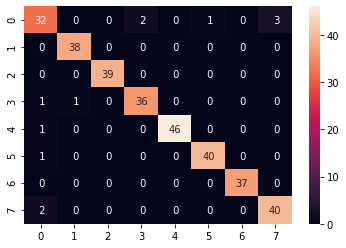

In [31]:
import seaborn as sns
import numpy as np
pred = model.predict(test_data_genB)
pred=np.argmax(pred,axis=1)
pred_df=B_test.copy()
labels={}
for l,v in test_data_genB.class_indices.items():
    print(l)
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

0
1
2
3
4
5
6
7
Accuracy Score: 0.953125


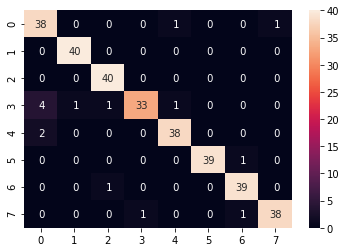

In [32]:
import seaborn as sns
import numpy as np
pred = model.predict(test_data_genA)
pred=np.argmax(pred,axis=1)
pred_df=A_test.copy()
labels={}
for l,v in test_data_genA.class_indices.items():
    print(l)
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')